## Online Retail Exploratory Data Analysis with Python 

The dataset contained valuable information about customer purchases, including product details, quantities, prices, and timestamps. My main task was to explore and analyze this dataset to gain crucial insights into the store's sales trends, customer behavior, and popular products.

By conducting thorough exploratory data analysis, I was able to identify meaningful patterns, outliers, and correlations in the data.

Throughout the project, I utilized various data visualizations and statistical analysis techniques to uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. These insights proved to be invaluable in driving strategic business decisions and improving the store's overall performance in the highly competitive online retail market.

#### Task 1: Load the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
online_retail = pd.read_excel("C:/Users/RAMAR BOSE/Downloads/Online Retail.xlsx")

In [4]:
online_retail.head(10)   # To display the first 10 rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [5]:
# To check the data types of the columns in the DataFrame, you can use the dtypes.

online_retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

#### Task 2: Data Cleaning

In [6]:
# 2.1 Check for Missing Values 
print(online_retail.isnull().sum())
online_retail.shape


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


(541909, 8)

In [7]:
# 2.2 Replacing Null Values 
# Replace null customerID's with unknown
online_retail['CustomerID'].replace(np.nan,"Unknown", inplace=True)

# Replace null description with Not Available
online_retail.dropna(subset=['Description'], inplace=True)

online_retail.shape

(540455, 8)

In [8]:
# 2.3 Removing Redundant or Unnecessary Columns

# Specify the column names to be removed
columns_to_drop = ["InvoiceNo", "StockCode"]
cleaned_online_retail = online_retail.drop(columns=columns_to_drop)

In [9]:
cleaned_online_retail.head(10)

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [10]:
# 2.4 Dropping the Duplicate Rows
cleaned_online_retail = cleaned_online_retail.drop_duplicates()
cleaned_online_retail.shape

(534532, 6)

In [11]:
# 2.5 Total Sell Amount
# Calculate the total sell amount for each transaction (Quantity * UnitPrice)
cleaned_online_retail['Totalsell'] = cleaned_online_retail['Quantity'] * cleaned_online_retail['UnitPrice']
cleaned_online_retail

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalsell
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


#### Task 3: Statistical Summary

In [12]:
cleaned_online_retail.describe()

,Quantity,UnitPrice,Totalsell
count,534532.000000,534532.000000,534532.000000
mean,9.701713,4.644063,18.184379
std,218.789309,97.424304,381.403007
min,-80995.000000,-11062.060000,-168469.600000
25%,1.000000,1.250000,3.750000
50%,3.000000,2.080000,9.900000
75%,10.000000,4.130000,17.400000
max,80995.000000,38970.000000,168469.600000


In [13]:
# Calculate measures of central tendency
median = cleaned_online_retail.median()
median

C:\Users\RAMAR BOSE\AppData\Local\Temp\ipykernel_50372\2678607994.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  median = cleaned_online_retail.median()
C:\Users\RAMAR BOSE\AppData\Local\Temp\ipykernel_50372\2678607994.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = cleaned_online_retail.median()


Quantity     3.00
UnitPrice    2.08
Totalsell    9.90
dtype: float64

In [14]:
# Create a new column 'MonthYear' with the month and year only for Data Visualization
cleaned_online_retail['MonthYear'] = cleaned_online_retail['InvoiceDate'].dt.to_period('M')

# Print the DataFrame with the 'MonthYear' column
cleaned_online_retail

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalsell,MonthYear
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
...,...,...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12
541905,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12
541906,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12


#### Task 4: Data Visualization

Text(0, 0.5, 'TotalSell')

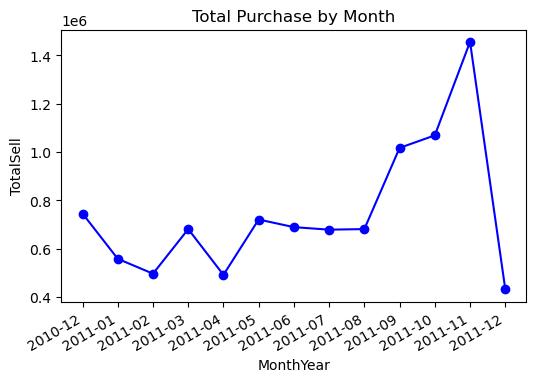

In [15]:
# 4.1 Line Plot
# Group the data by 'MonthYear' and calculate the total purchase for each month
monthly_data = cleaned_online_retail.groupby('MonthYear')['Totalsell'].sum().reset_index()

# Convert the 'MonthYear' column to string format for plotly
monthly_data['MonthYear'] = monthly_data['MonthYear'].astype(str)

# Set the figure size using subplots
fig, ax = plt.subplots(figsize=(6, 4)) # Width: 10 inches, Height: 5 inches

# Automatic formatting to the x-axis labels when dealing with dates. 
fig.autofmt_xdate()  

# Display the plot
plt.plot(monthly_data['MonthYear'], monthly_data['Totalsell'], marker='o', linestyle='-', color='b')

# Customize the plot
plt.title('Total Purchase by Month')
plt.xlabel('MonthYear')
plt.ylabel('TotalSell')


C:\Users\RAMAR BOSE\AppData\Local\Temp\ipykernel_50372\3863287093.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = cleaned_online_retail.corr()


,Quantity,UnitPrice,Totalsell
Quantity,1.000000,-0.001261,0.889831
UnitPrice,-0.001261,1.000000,-0.162052
Totalsell,0.889831,-0.162052,1.000000


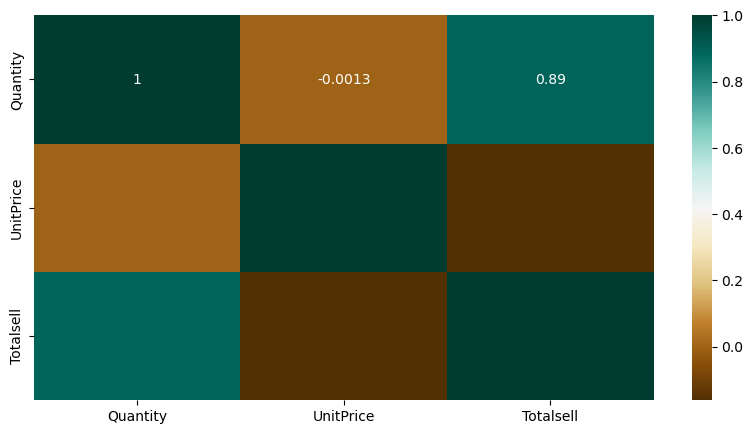

In [16]:
#4.2 Heat Maps 
#We can use the Pandas method corr() to find the feature that is most correlated with TotalPurchase.
plt.figure(figsize=(10,5))
corr = cleaned_online_retail.corr()
sns.heatmap(corr,cmap="BrBG",annot=True)
corr


#### Task 5: Analyze the Sales Trends over Time

In [17]:
# Extract the month from the 'InvoiceDate'
cleaned_online_retail['Month'] = cleaned_online_retail['InvoiceDate'].dt.month

# Extract the day of the week from the 'InvoiceDate'
cleaned_online_retail['DayOfWeek'] = cleaned_online_retail['InvoiceDate'].dt.day_name()

# Calculate total sales for each month
monthly_sales = cleaned_online_retail.groupby('Month')['Totalsell'].sum()

# Calculate total sales for each day of the week
daily_sales = cleaned_online_retail.groupby('DayOfWeek')['Totalsell'].sum()

# Identify the busiest month
busiest_month = monthly_sales.idxmax()

# Identify the busiest day of the week
busiest_day = daily_sales.idxmax()

# Print the results
print('\033[1m' + "Busiest Month (in terms of sells):" +'\033[0m', busiest_month)
print('\033[1m' + "Busiest Day of the Week (in terms of sales):" +'\033[0m', busiest_day)

Busiest Month (in terms of sells): 11
Busiest Day of the Week (in terms of sales): Thursday


Text(0.5, 1.0, 'Sales Trend by Day of Week')

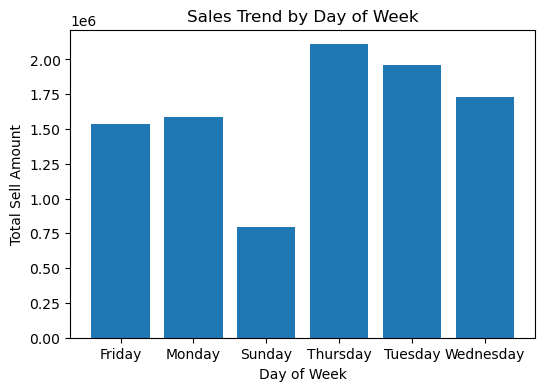

In [18]:
# 5.1 Bar Plot
plt.figure(figsize=(6, 4))
plt.bar(daily_sales.index, daily_sales.values)
plt.xlabel('Day of Week')
plt.ylabel('Total Sell Amount')
plt.title('Sales Trend by Day of Week')

In [19]:
# 5.2 Who were the Best Customers Throughtout the Year?
# Calculate the total purchase amount for each customer
customer_total_purchase = cleaned_online_retail.groupby('CustomerID')['Totalsell'].sum()

# Sort the customers based on the total purchase amount in descending order
most_valuable_customers = customer_total_purchase.sort_values(ascending=False)

# Convert the Series to a DataFrame
most_valuable_customers_df = pd.DataFrame(most_valuable_customers, columns=['Totalsell']).reset_index()

# Count the total number of customers
total_customers = cleaned_online_retail['CustomerID'].nunique()

# Print the total number of customers and the top 10 customers
print('\033[1m' + f"Among {total_customers} customers, the top 10 customers are:" +'\033[0m', list(most_valuable_customers_df['CustomerID'][:10]))

Among 4373 customers, the top 10 customers are: ['Unknown', 14646.0, 18102.0, 17450.0, 14911.0, 12415.0, 14156.0, 17511.0, 16684.0, 13694.0]


#### Task 6: Top-selling Products and Countries

In [20]:
# Find most valualble Items in the list
items_total_sell = cleaned_online_retail.groupby('Description')['Totalsell'].sum()

# Sort the items based on the total sells in ascending order
most_valuable_items = items_total_sell.sort_values(ascending=False)

# Convert the Series to a DataFrame
most_valuable_items_df = pd.DataFrame(most_valuable_items, columns=['Totalsell']).reset_index()

# Count the total number of items
total_items = cleaned_online_retail['Description'].nunique()

# Print the total number of Items and the top 10 items
print('\033[1m' + f"Among {total_items} items, the 10 most valuable items are:" +'\033[0m', list(most_valuable_items_df['Description'][:10]))

Among 4223 items, the 10 most valuable items are: ['DOTCOM POSTAGE', 'REGENCY CAKESTAND 3 TIER', 'WHITE HANGING HEART T-LIGHT HOLDER', 'PARTY BUNTING', 'JUMBO BAG RED RETROSPOT', 'RABBIT NIGHT LIGHT', 'POSTAGE', "PAPER CHAIN KIT 50'S CHRISTMAS ", 'ASSORTED COLOUR BIRD ORNAMENT', 'CHILLI LIGHTS']


In [21]:
# Find country with most sells in the list
countrywise_sell = cleaned_online_retail.groupby('Country')['Totalsell'].sum()

# Sort countries based on the total sells in ascending order
top_selling_country = countrywise_sell.sort_values(ascending=False)

# Convert the Series to a DataFrame
top_selling_country_df = pd.DataFrame(top_selling_country, columns=['Totalsell']).reset_index()

# Count the total countries
total_countries = cleaned_online_retail['Country'].nunique()

# Print the total countries and the top 10 countries
print('\033[1m' + f"Among {total_countries} countries, the top 10 selling countries are:" +'\033[0m', list(top_selling_country_df['Country'][:10]))

Among 38 countries, the top 10 selling countries are: ['United Kingdom', 'Netherlands', 'EIRE', 'Germany', 'France', 'Australia', 'Switzerland', 'Spain', 'Belgium', 'Sweden']


#### Task 7: Identify any Outliers or Anomalies in the Dataset

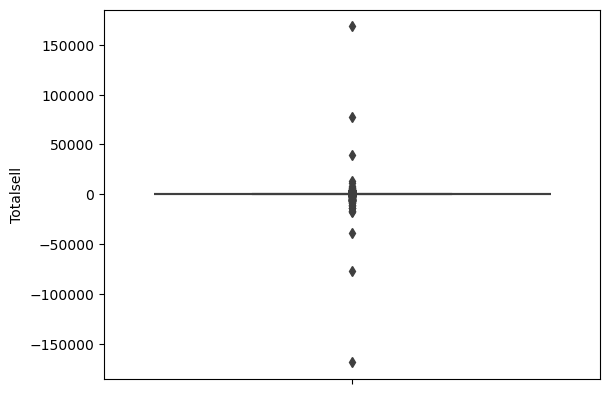

In [22]:
# Create a box plot
sns.boxplot(data=cleaned_online_retail, y='Totalsell')

# Display the plot
plt.show()

In [23]:
# 7.1 Z-Score 
from scipy import stats

# Calculate the Z-Score for the 'Quantity' column
z_scores = stats.zscore(cleaned_online_retail['Totalsell'])

# Create a boolean mask to identify outliers (both positive and negative Z-scores)
threshold = 3
outlier_mask = abs(z_scores) > threshold

# Extract outliers from the DataFrame
outliers = cleaned_online_retail[outlier_mask]

outliers.shape

(396, 10)